**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "annotation_ccre")
fnames = dir(fdiry)
fnames

[1] "peak.annotation.ccre_v3.bed.gz" "peak.annotation.ccre_v4.bed.gz"

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_ccre")
fnames = dir(fdiry)
fnames

[1] "description.tsv"

## Import data

In [4]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_ccre")
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_cnames = dat
print(dim(dat))
dat

Rows: 11 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Name, Description

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 11  2


Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Name
Score,Score
Strand,[+-.]; Use '.' if no strand is assigned.
ThickStart,The starting position at which the feature is drawn thickly
ThickEnd,The ending position at which the feature is drawn thickly
ItemRgb,"An RGB value of the form R,G,B (e.g. 255,0,0)"


In [6]:
### init
annotation = "ccre_v3"
cnames = dat_cnames$Name
cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "annotation_ccre")
fname = "peak.annotation.ccre_v3.bed.gz"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(
    Peak_ATAC  = paste(Chrom_ATAC, Start_ATAC, End_ATAC, sep="_"),
    Annotation = annotation,
    Label      = Category
)

### assign and show
dat_peak_annot = dat
print(dim(dat))
head(dat)

[1] 264958     18


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRgb,Category,Note,Overlap,Peak_ATAC,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,180982,182087,chr1,181251,181601,EH38E1310153,0,.,181251,181601,"6,218,147",DNase-only,All-data/Full-classification,350,chr1_180982_182087,ccre_v3,DNase-only
chr1,777949,779437,chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification,350,chr1_777949_779437,ccre_v3,"PLS,CTCF-bound"
chr1,777949,779437,chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification,269,chr1_777949_779437,ccre_v3,PLS
chr1,812211,813042,chr1,812113,812266,EH38E1310165,0,.,812113,812266,"225,225,225",Low-DNase,All-data/Full-classification,55,chr1_812211_813042,ccre_v3,Low-DNase
chr1,816774,817547,chr1,817080,817403,EH38E1310166,0,.,817080,817403,"225,225,225",Low-DNase,All-data/Full-classification,323,chr1_816774_817547,ccre_v3,Low-DNase
chr1,817905,818348,chr1,817903,818252,EH38E1310167,0,.,817903,818252,"225,225,225",Low-DNase,All-data/Full-classification,347,chr1_817905_818348,ccre_v3,Low-DNase


## Arrange and summarize

In [7]:
dat = dat_peak_annot
dat = dat %>% 
    dplyr::group_by(Peak_ATAC, Annotation, Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

dat = dat %>% dplyr::rename("Peak" = "Peak_ATAC")

### assign and show
dat_peak_annot_count = dat
print(dim(dat))
head(dat)

[1] 173935      4


Peak,Annotation,Label,Count
<chr>,<chr>,<chr>,<int>
chr10_100009096_100010466,ccre_v3,"DNase-H3K4me3,CTCF-bound",2
chr10_100009096_100010466,ccre_v3,Low-DNase,1
chr10_100009096_100010466,ccre_v3,"PLS,CTCF-bound",1
chr10_100020710_100021134,ccre_v3,Low-DNase,2
chr10_100045961_100046653,ccre_v3,"CTCF-only,CTCF-bound",1
chr10_100065094_100065486,ccre_v3,Low-DNase,1


## Save results

In [8]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre_v3.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_annot_count
write_tsv(dat, fpath)

In [11]:
lst = str_split(string = fnames, pattern = "\\.")
lst = lapply(lst, function(vec){vec[3]})
annotations = unlist(lst)
annotations

[1] "ccre_v3" "ccre_v4"

In [17]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "annotation_ccre")

lst = lapply(annotations, function(annotation){
    ###
    fname = paste("*", annotation, "bed.gz", sep = ".")
    fglob = file.path(fdiry, fname)
    fpath = Sys.glob(fglob)
    
    ###
    cnames = c(
        "Chrom", "Start", "End",
        "Chrom_ccre", "Start_ccre", "End_ccre", "Name_ccre", "Score", "Strand", 
        "thickStart", "thickEnd", "itemRgb", 
        "Category", "Note", "Overlap")
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    dat = dat %>% 
        dplyr::mutate(Peak = paste(Chrom, Start, End, sep="_")) %>%
        dplyr::mutate(Annotation = annotation)
    return(dat)
})

lst_peak_annot = lst
print(length(lst))
head(lst[[1]])

[1] 2


Chrom,Start,End,Chrom_ccre,Start_ccre,End_ccre,Name_ccre,Score,Strand,thickStart,thickEnd,itemRgb,Category,Note,Overlap,Peak,Annotation
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
chr1,180982,182087,chr1,181251,181601,EH38E1310153,0,.,181251,181601,"6,218,147",DNase-only,All-data/Full-classification,350,chr1_180982_182087,ccre_v3
chr1,777949,779437,chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification,350,chr1_777949_779437,ccre_v3
chr1,777949,779437,chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification,269,chr1_777949_779437,ccre_v3
chr1,812211,813042,chr1,812113,812266,EH38E1310165,0,.,812113,812266,"225,225,225",Low-DNase,All-data/Full-classification,55,chr1_812211_813042,ccre_v3
chr1,816774,817547,chr1,817080,817403,EH38E1310166,0,.,817080,817403,"225,225,225",Low-DNase,All-data/Full-classification,323,chr1_816774_817547,ccre_v3
chr1,817905,818348,chr1,817903,818252,EH38E1310167,0,.,817903,818252,"225,225,225",Low-DNase,All-data/Full-classification,347,chr1_817905_818348,ccre_v3


In [31]:
lst = lst_peak_annot
dat = bind_rows(lst)
dat %>% dplyr::filter(Peak == "chr10_100009096_100010466")

Chrom,Start,End,Chrom_ccre,Start_ccre,End_ccre,Name_ccre,Score,Strand,thickStart,thickEnd,itemRgb,Category,Note,Overlap,Peak,Annotation
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
chr10,100009096,100010466,chr10,100009359,100009597,EH38E1493252,0,.,100009359,100009597,"255,170,170","DNase-H3K4me3,CTCF-bound",All-data/Full-classification,238,chr10_100009096_100010466,ccre_v3
chr10,100009096,100010466,chr10,100009618,100009775,EH38E1493253,0,.,100009618,100009775,"255,170,170","DNase-H3K4me3,CTCF-bound",All-data/Full-classification,157,chr10_100009096_100010466,ccre_v3
chr10,100009096,100010466,chr10,100009796,100010146,EH38E1493254,0,.,100009796,100010146,"255,0,0","PLS,CTCF-bound",All-data/Full-classification,350,chr10_100009096_100010466,ccre_v3
chr10,100009096,100010466,chr10,100010233,100010583,EH38E1493255,0,.,100010233,100010583,"225,225,225",Low-DNase,All-data/Full-classification,233,chr10_100009096_100010466,ccre_v3
chr10,100009096,100010466,chr10,100009359,100009597,EH38E1493252,0,.,100009359,100009597,"255,170,170",CA-H3K4me3,All-data/Full-classification,238,chr10_100009096_100010466,ccre_v4
chr10,100009096,100010466,chr10,100009615,100009781,EH38E2919952,0,.,100009615,100009781,"255,167,0",pELS,All-data/Full-classification,166,chr10_100009096_100010466,ccre_v4
chr10,100009096,100010466,chr10,100009828,100010178,EH38E2919953,0,.,100009828,100010178,"255,0,0",PLS,All-data/Full-classification,350,chr10_100009096_100010466,ccre_v4
chr10,100009096,100010466,chr10,100010237,100010448,EH38E2919954,0,.,100010237,100010448,"255,170,170",CA-H3K4me3,All-data/Full-classification,211,chr10_100009096_100010466,ccre_v4
chr10,100009096,100010466,chr10,100010459,100010690,EH38E2919955,0,.,100010459,100010690,"225,225,225",Low-DNase,All-data/Full-classification,7,chr10_100009096_100010466,ccre_v4


In [33]:
table(dat$Annotation, dat$Category)

         
          CA-CTCF CA-H3K4me3 CA-only  CA-TF CTCF-only,CTCF-bound   dELS
  ccre_v3       0          0       0      0                12696  15142
  ccre_v4   24167       5078    1812  30229                    0  29665
         
          dELS,CTCF-bound DNase-H3K4me3 DNase-H3K4me3,CTCF-bound DNase-only
  ccre_v3            2598          4202                     1977       7151
  ccre_v4               0             0                        0          0
         
          Low-DNase   pELS pELS,CTCF-bound    PLS PLS,CTCF-bound
  ccre_v3    175906  23331            4375  14142           3438
  ccre_v4    335622  34290               0  19610              0

In [34]:
lst = lst_peak_annot
dat = bind_rows(lst)
dat = dat %>% 
    dplyr::select(Peak, Category, Annotation) %>%
    dplyr::group_by(Peak, Category, Annotation) %>%
    dplyr::summarize(Count = n(), .groups = "drop") %>%
    dplyr::arrange(Annotation, Peak, Category, Count)

dat_peak_summary_ccre = dat
print(dim(dat))
head(dat)

[1] 451244      4


Peak,Category,Annotation,Count
<chr>,<chr>,<chr>,<int>
chr10_100009096_100010466,"DNase-H3K4me3,CTCF-bound",ccre_v3,2
chr10_100009096_100010466,Low-DNase,ccre_v3,1
chr10_100009096_100010466,"PLS,CTCF-bound",ccre_v3,1
chr10_100020710_100021134,Low-DNase,ccre_v3,2
chr10_100045961_100046653,"CTCF-only,CTCF-bound",ccre_v3,1
chr10_100065094_100065486,Low-DNase,ccre_v3,1


In [35]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.ccre.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_peak_summary_ccre, fpath)

In [36]:
library("UpSetR")

In [38]:
dat = dat_peak_summary_ccre
dat = dat %>% dplyr::filter(Annotation == "ccre_v3")
lst = split(dat$Peak, dat$Category)
print(unique(dat$Category))

 [1] "DNase-H3K4me3,CTCF-bound" "Low-DNase"               
 [3] "PLS,CTCF-bound"           "CTCF-only,CTCF-bound"    
 [5] "PLS"                      "pELS"                    
 [7] "pELS,CTCF-bound"          "dELS"                    
 [9] "DNase-only"               "DNase-H3K4me3"           
[11] "dELS,CTCF-bound"         


In [43]:
print(length(lst))
print(names(lst))
cat("\n\n")
for (idx in names(lst)){
    vec = lst[[idx]]
    cat(idx, "|", length(vec), "\n")
}

[1] 11
 [1] "CTCF-only,CTCF-bound"     "dELS"                    
 [3] "dELS,CTCF-bound"          "DNase-H3K4me3"           
 [5] "DNase-H3K4me3,CTCF-bound" "DNase-only"              
 [7] "Low-DNase"                "pELS"                    
 [9] "pELS,CTCF-bound"          "PLS"                     
[11] "PLS,CTCF-bound"          


CTCF-only,CTCF-bound | 12088 
dELS | 9237 
dELS,CTCF-bound | 1994 
DNase-H3K4me3 | 2896 
DNase-H3K4me3,CTCF-bound | 1533 
DNase-only | 6325 
Low-DNase | 113641 
pELS | 10443 
pELS,CTCF-bound | 3200 
PLS | 9644 
PLS,CTCF-bound | 2934 


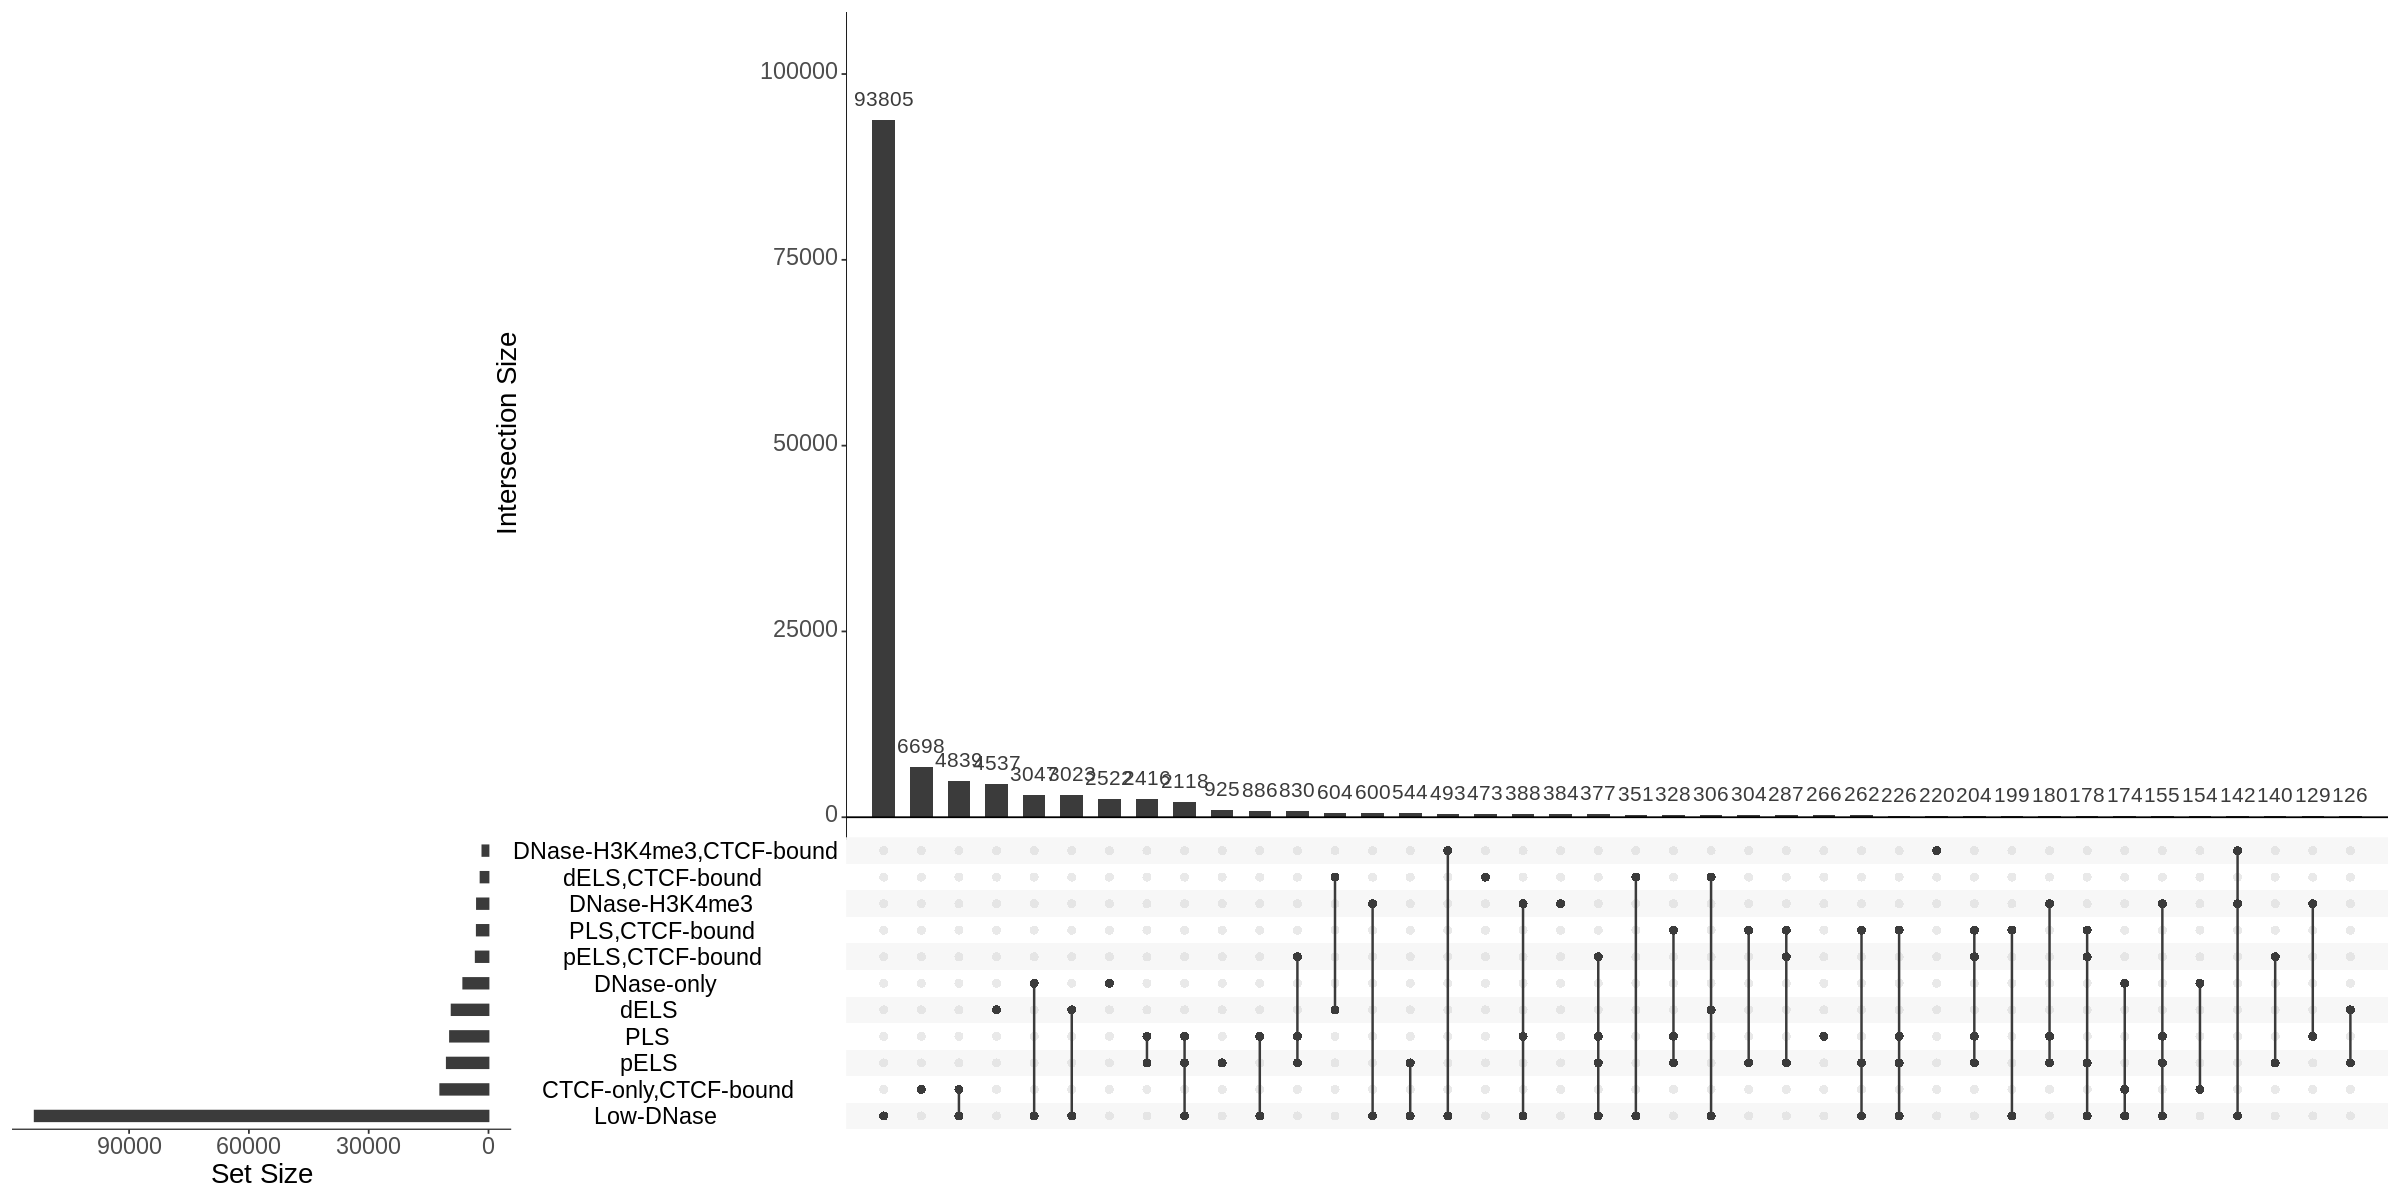

In [47]:
options(repr.plot.height=10, repr.plot.width=20)
upset(fromList(lst), order.by = "freq", text.scale = 2, nsets = 11)

In [48]:
dat = dat_peak_summary_ccre
dat = dat %>% dplyr::filter(Annotation == "ccre_v4")
lst = split(dat$Peak, dat$Category)
print(unique(dat$Category))

[1] "CA-H3K4me3" "Low-DNase"  "PLS"        "pELS"       "CA-CTCF"   
[6] "CA-TF"      "dELS"       "CA-only"   


In [49]:
print(length(lst))
print(names(lst))
cat("\n\n")
for (idx in names(lst)){
    vec = lst[[idx]]
    cat(idx, "|", length(vec), "\n")
}

[1] 8
[1] "CA-CTCF"    "CA-H3K4me3" "CA-only"    "CA-TF"      "dELS"      
[6] "Low-DNase"  "pELS"       "PLS"       


CA-CTCF | 23298 
CA-H3K4me3 | 3240 
CA-only | 1546 
CA-TF | 26756 
dELS | 15782 
Low-DNase | 181650 
pELS | 12960 
PLS | 12077 


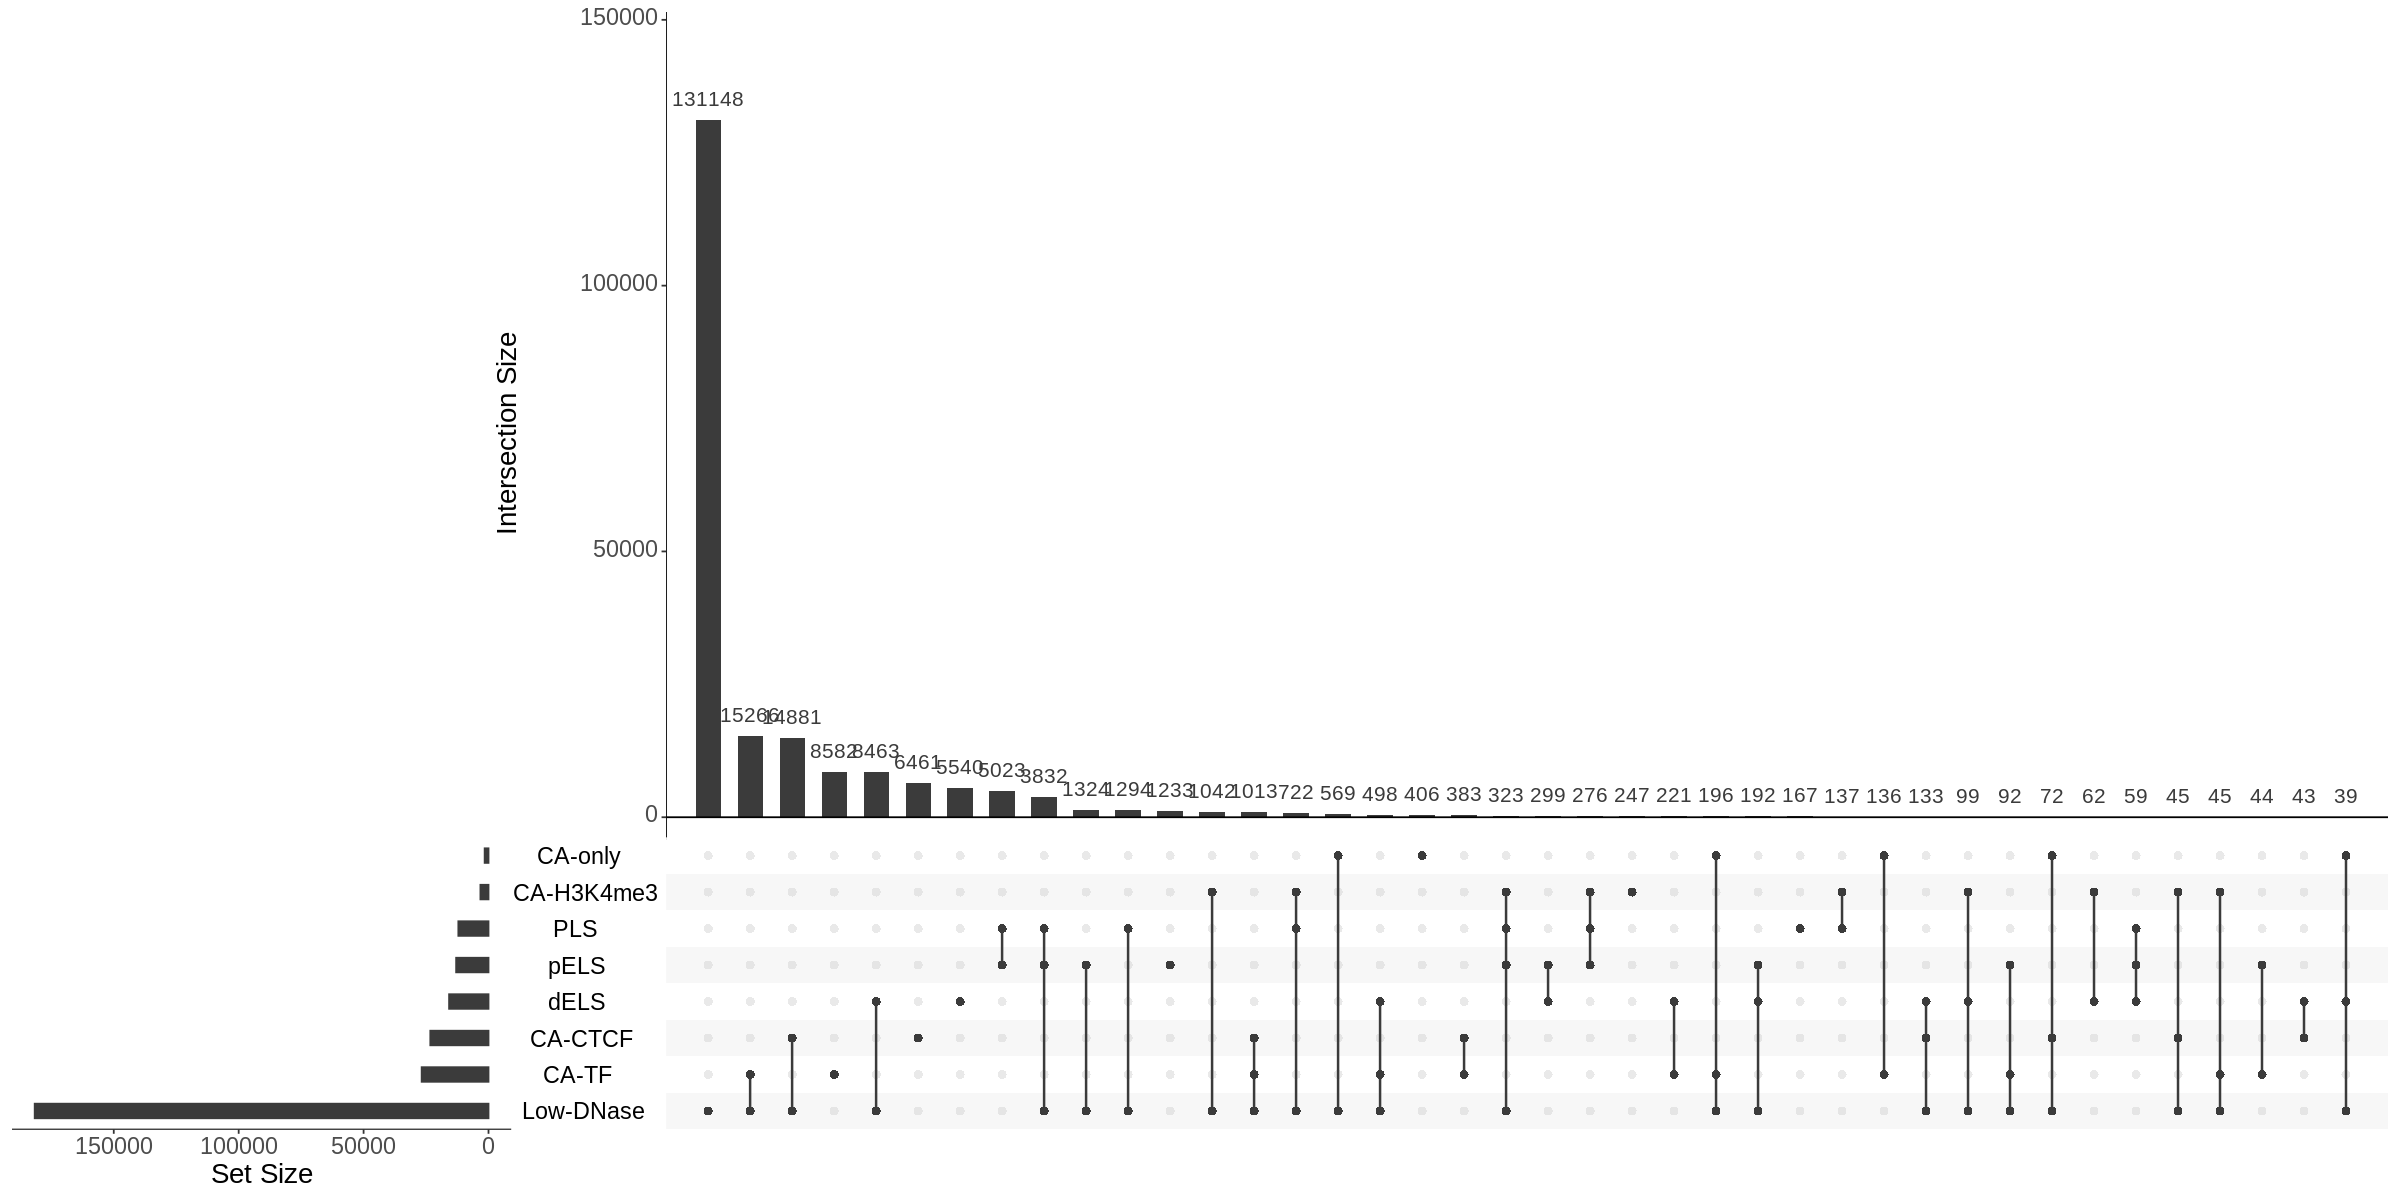

In [50]:
options(repr.plot.height=10, repr.plot.width=20)
upset(fromList(lst), order.by = "freq", text.scale = 2, nsets = 8)